## Notebook setup

In [1]:
import os
import io
import warnings
import datetime
import numpy as np
import base64
import pytz
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

# import sys
# sys.path.append('../../')

from openbb_terminal.api import widgets
from openbb_terminal.api import helper
from openbb_terminal.api import openbb
from openbb_terminal.api import Portfolio
from openbb_terminal.helper_classes import TerminalStyle

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

# Detect if prediction capabilities are present. If they are not, disable prediction in the rest of the script
# so that the report can still be generated without prediction results.
# predictions = True
# try:
#     openbb.stocks.pred.models
# except Exception as e:
#     predictions = False

# TODO Fix predictions virtual path on api refactored

predictions = False

WARNING! Breaking changes incoming! Especially avoid using kwargs, since some of them will change.
You can try <link> branch with the latest changes.


### Header

In [2]:
theme = TerminalStyle("dark", "dark", "dark")
stylesheet = widgets.html_report_stylesheet()
user_time_zone = pytz.timezone(helper.get_user_timezone())

In [3]:
# Parameters that will be replaced when calling this notebook
orderbook = "Public_Equity_Orderbook.xlsx"
report_name = "Portfolio Report"

In [4]:
if 'reports' in os.getcwd():
    holdings = "../../portfolio/holdings/"
else:
    holdings = "portfolio/holdings/"

In [5]:
orderbook_path = holdings + orderbook
_, orderbook_file = os.path.split(orderbook_path)
report_title = f"Portfolio report for {orderbook_file}"
report_date = pd.Timestamp.now(tz=user_time_zone).strftime("%d %B, %Y")
report_time = pd.Timestamp.now(tz=user_time_zone).strftime("%H:%M")
report_timezone = pd.Timestamp.now(tz=user_time_zone).tzinfo
report_title, report_date, report_time, report_timezone

('Portfolio report for Public_Equity_Orderbook.xlsx',
 '19 September, 2022',
 '09:50',
 <DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)

## Data

Loading

In [6]:
file = "../../portfolio/allocation/OpenBB_Portfolio_Template_v1.0.0.xlsx"
tickers, categories = openbb.portfolio.po.load(file)

In [7]:
openbb.portfolio.po.maxsharpe(tickers)

({'AAPL': 0.4044,
  'AMZN': 0.0,
  'APTV': 0.0,
  'ASML': 0.0,
  'BABA': 0.0,
  'GOOGL': 0.0,
  'HYG': 0.0,
  'IYR': 0.0,
  'NKE': 0.0,
  'PEX': 0.0,
  'PSP': 0.0,
  'REZ': 0.0,
  'TIP': 0.55408,
  'TLT': 0.0,
  'TSM': 0.04153},
                 AAPL      AMZN      APTV      ASML      BABA     GOOGL  \
 Date                                                                     
 2019-09-19 -0.008125  0.002223 -0.000447 -0.000801  0.002556  0.004949   
 2019-09-20 -0.014618 -0.015010 -0.026825 -0.015225  0.011360 -0.007193   
 2019-09-23  0.004547 -0.004938  0.010566  0.010944 -0.030300  0.003944   
 2019-09-24 -0.004755 -0.024472 -0.014774 -0.008411 -0.030681 -0.013250   
 2019-09-25  0.015390  0.015342  0.015919  0.004627  0.029787  0.022662   
 ...              ...       ...       ...       ...       ...       ...   
 2022-09-12  0.038508  0.023861  0.031114  0.007844  0.027675  0.001898   
 2022-09-13 -0.058680 -0.070575 -0.027268 -0.066999 -0.055127 -0.058993   
 2022-09-14  0.009555

In [8]:
openbb.portfolio.po.minrisk(tickers)

({'AAPL': 0.0,
  'AMZN': 0.0,
  'APTV': 0.0,
  'ASML': 0.0,
  'BABA': 0.00193,
  'GOOGL': 0.0,
  'HYG': 0.23993,
  'IYR': 0.0,
  'NKE': 0.0,
  'PEX': 0.0,
  'PSP': 0.0,
  'REZ': 0.0,
  'TIP': 0.75814,
  'TLT': 0.0,
  'TSM': 0.0},
                 AAPL      AMZN      APTV      ASML      BABA     GOOGL  \
 Date                                                                     
 2019-09-19 -0.008125  0.002223 -0.000447 -0.000801  0.002556  0.004949   
 2019-09-20 -0.014618 -0.015010 -0.026825 -0.015225  0.011360 -0.007193   
 2019-09-23  0.004547 -0.004938  0.010566  0.010944 -0.030300  0.003944   
 2019-09-24 -0.004755 -0.024472 -0.014774 -0.008411 -0.030681 -0.013250   
 2019-09-25  0.015390  0.015342  0.015919  0.004627  0.029787  0.022662   
 ...              ...       ...       ...       ...       ...       ...   
 2022-09-12  0.038508  0.023861  0.031114  0.007844  0.027675  0.001898   
 2022-09-13 -0.058680 -0.070575 -0.027268 -0.066999 -0.055127 -0.058993   
 2022-09-14  0.00955

In [9]:
openbb.portfolio.po.maxutil(tickers)

({'AAPL': 1.0,
  'AMZN': 0.0,
  'APTV': 0.0,
  'ASML': 0.0,
  'BABA': 0.0,
  'GOOGL': 0.0,
  'HYG': 0.0,
  'IYR': 0.0,
  'NKE': 0.0,
  'PEX': 0.0,
  'PSP': 0.0,
  'REZ': 0.0,
  'TIP': 0.0,
  'TLT': 0.0,
  'TSM': 0.0},
                 AAPL      AMZN      APTV      ASML      BABA     GOOGL  \
 Date                                                                     
 2019-09-19 -0.008125  0.002223 -0.000447 -0.000801  0.002556  0.004949   
 2019-09-20 -0.014618 -0.015010 -0.026825 -0.015225  0.011360 -0.007193   
 2019-09-23  0.004547 -0.004938  0.010566  0.010944 -0.030300  0.003944   
 2019-09-24 -0.004755 -0.024472 -0.014774 -0.008411 -0.030681 -0.013250   
 2019-09-25  0.015390  0.015342  0.015919  0.004627  0.029787  0.022662   
 ...              ...       ...       ...       ...       ...       ...   
 2022-09-12  0.038508  0.023861  0.031114  0.007844  0.027675  0.001898   
 2022-09-13 -0.058680 -0.070575 -0.027268 -0.066999 -0.055127 -0.058993   
 2022-09-14  0.009555  0.013641 

In [10]:
openbb.portfolio.po.maxret(tickers)

({'AAPL': 1.0,
  'AMZN': 0.0,
  'APTV': 0.0,
  'ASML': 0.0,
  'BABA': 0.0,
  'GOOGL': 0.0,
  'HYG': 0.0,
  'IYR': 0.0,
  'NKE': 0.0,
  'PEX': 0.0,
  'PSP': 0.0,
  'REZ': 0.0,
  'TIP': 0.0,
  'TLT': 0.0,
  'TSM': 0.0},
                 AAPL      AMZN      APTV      ASML      BABA     GOOGL  \
 Date                                                                     
 2019-09-19 -0.008125  0.002223 -0.000447 -0.000801  0.002556  0.004949   
 2019-09-20 -0.014618 -0.015010 -0.026825 -0.015225  0.011360 -0.007193   
 2019-09-23  0.004547 -0.004938  0.010566  0.010944 -0.030300  0.003944   
 2019-09-24 -0.004755 -0.024472 -0.014774 -0.008411 -0.030681 -0.013250   
 2019-09-25  0.015390  0.015342  0.015919  0.004627  0.029787  0.022662   
 ...              ...       ...       ...       ...       ...       ...   
 2022-09-12  0.038508  0.023861  0.031114  0.007844  0.027675  0.001898   
 2022-09-13 -0.058680 -0.070575 -0.027268 -0.066999 -0.055127 -0.058993   
 2022-09-14  0.009555  0.013641 

In [11]:
openbb.portfolio.po.maxdiv(tickers)

({'AAPL': 0.01858,
  'AMZN': 0.04099,
  'APTV': 0.00841,
  'ASML': 0.0,
  'BABA': 0.08411,
  'GOOGL': 0.0,
  'HYG': 0.0,
  'IYR': 0.0,
  'NKE': 0.05705,
  'PEX': 0.0,
  'PSP': 0.0,
  'REZ': 0.14989,
  'TIP': 0.04167,
  'TLT': 0.51409,
  'TSM': 0.08522},
                 AAPL      AMZN      APTV      ASML      BABA     GOOGL  \
 Date                                                                     
 2019-09-19 -0.008125  0.002223 -0.000447 -0.000801  0.002556  0.004949   
 2019-09-20 -0.014618 -0.015010 -0.026825 -0.015225  0.011360 -0.007193   
 2019-09-23  0.004547 -0.004938  0.010566  0.010944 -0.030300  0.003944   
 2019-09-24 -0.004755 -0.024472 -0.014774 -0.008411 -0.030681 -0.013250   
 2019-09-25  0.015390  0.015342  0.015919  0.004627  0.029787  0.022662   
 ...              ...       ...       ...       ...       ...       ...   
 2022-09-12  0.038508  0.023861  0.031114  0.007844  0.027675  0.001898   
 2022-09-13 -0.058680 -0.070575 -0.027268 -0.066999 -0.055127 -0.058993

In [12]:
openbb.portfolio.po.maxdecorr(tickers)

({'AAPL': 0.02501,
  'AMZN': 0.05711,
  'APTV': 0.01703,
  'ASML': 0.0,
  'BABA': 0.16802,
  'GOOGL': 0.0,
  'HYG': 0.0,
  'IYR': 0.0,
  'NKE': 0.07585,
  'PEX': 0.0,
  'PSP': 0.0,
  'REZ': 0.16846,
  'TIP': 0.01169,
  'TLT': 0.35302,
  'TSM': 0.12382},
                 AAPL      AMZN      APTV      ASML      BABA     GOOGL  \
 Date                                                                     
 2019-09-19 -0.008125  0.002223 -0.000447 -0.000801  0.002556  0.004949   
 2019-09-20 -0.014618 -0.015010 -0.026825 -0.015225  0.011360 -0.007193   
 2019-09-23  0.004547 -0.004938  0.010566  0.010944 -0.030300  0.003944   
 2019-09-24 -0.004755 -0.024472 -0.014774 -0.008411 -0.030681 -0.013250   
 2019-09-25  0.015390  0.015342  0.015919  0.004627  0.029787  0.022662   
 ...              ...       ...       ...       ...       ...       ...   
 2022-09-12  0.038508  0.023861  0.031114  0.007844  0.027675  0.001898   
 2022-09-13 -0.058680 -0.070575 -0.027268 -0.066999 -0.055127 -0.058993

In [13]:
weights, _ = openbb.portfolio.po.maxsharpe(tickers)
p_views = [
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
q_views = [0.1, 0.1, 0.05]

In [14]:
openbb.portfolio.po.blacklitterman(symbols = tickers, benchmark=weights, p_views=p_views, q_views=q_views)

({'AAPL': 0.31666,
  'AMZN': 0.0,
  'APTV': 0.0,
  'ASML': 0.0,
  'BABA': 0.0,
  'GOOGL': 0.0,
  'HYG': 0.0,
  'IYR': 0.0,
  'NKE': 0.0,
  'PEX': 0.0,
  'PSP': 0.0,
  'REZ': 0.0,
  'TIP': 0.68333,
  'TLT': 0.0,
  'TSM': 0.0},
                 AAPL      AMZN      APTV      ASML      BABA     GOOGL  \
 Date                                                                     
 2019-09-19 -0.008125  0.002223 -0.000447 -0.000801  0.002556  0.004949   
 2019-09-20 -0.014618 -0.015010 -0.026825 -0.015225  0.011360 -0.007193   
 2019-09-23  0.004547 -0.004938  0.010566  0.010944 -0.030300  0.003944   
 2019-09-24 -0.004755 -0.024472 -0.014774 -0.008411 -0.030681 -0.013250   
 2019-09-25  0.015390  0.015342  0.015919  0.004627  0.029787  0.022662   
 ...              ...       ...       ...       ...       ...       ...   
 2022-09-12  0.038508  0.023861  0.031114  0.007844  0.027675  0.001898   
 2022-09-13 -0.058680 -0.070575 -0.027268 -0.066999 -0.055127 -0.058993   
 2022-09-14  0.009555  0

In [15]:
openbb.portfolio.po.meanrisk(tickers)

({'AAPL': 0.4044,
  'AMZN': 0.0,
  'APTV': 0.0,
  'ASML': 0.0,
  'BABA': 0.0,
  'GOOGL': 0.0,
  'HYG': 0.0,
  'IYR': 0.0,
  'NKE': 0.0,
  'PEX': 0.0,
  'PSP': 0.0,
  'REZ': 0.0,
  'TIP': 0.55408,
  'TLT': 0.0,
  'TSM': 0.04153},
                 AAPL      AMZN      APTV      ASML      BABA     GOOGL  \
 Date                                                                     
 2019-09-19 -0.008125  0.002223 -0.000447 -0.000801  0.002556  0.004949   
 2019-09-20 -0.014618 -0.015010 -0.026825 -0.015225  0.011360 -0.007193   
 2019-09-23  0.004547 -0.004938  0.010566  0.010944 -0.030300  0.003944   
 2019-09-24 -0.004755 -0.024472 -0.014774 -0.008411 -0.030681 -0.013250   
 2019-09-25  0.015390  0.015342  0.015919  0.004627  0.029787  0.022662   
 ...              ...       ...       ...       ...       ...       ...   
 2022-09-12  0.038508  0.023861  0.031114  0.007844  0.027675  0.001898   
 2022-09-13 -0.058680 -0.070575 -0.027268 -0.066999 -0.055127 -0.058993   
 2022-09-14  0.009555

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


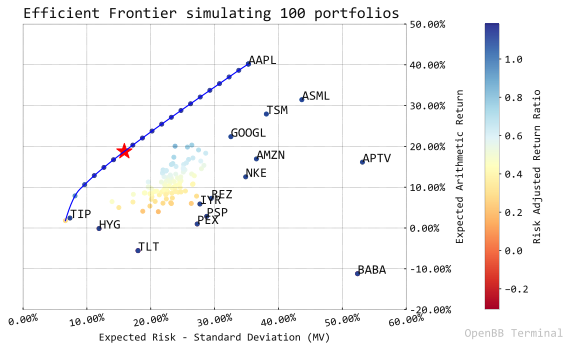

In [16]:
openbb.portfolio.po.ef(tickers, chart=True)